<a href="https://colab.research.google.com/github/8dci/T5/blob/main/YOLO_Exsam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# prompt: library opencv

!pip install opencv-python

In [2]:
!pip install ultralytics
!pip install opencv-p

ERROR: Could not find a version that satisfies the requirement opencv-p (from versions: none)
ERROR: No matching distribution found for opencv-p


In [3]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/YOLO_Model.pt')
print("YOLO model loaded successfully.")

YOLO model loaded successfully.


In [4]:
import cv2
video_path = '/content/drive/MyDrive/YOLO_Video.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()
print("Video capture initialized successfully.")

Video capture initialized successfully.


In [5]:
import cv2

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Video Width: {frame_width}")
print(f"Video Height: {frame_height}")
print(f"Frames per Second (FPS): {fps}")

Video Width: 1920
Video Height: 1080
Frames per Second (FPS): 29.97002997002997


In [6]:
import cv2
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

output_path = '/content/exam_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

print("Video writer initialized successfully.")

Video writer initialized successfully.



0: 384x640 2 buss, 90 cars, 2 trucks, 2 vans, 3374.6ms
Speed: 22.0ms preprocess, 3374.6ms inference, 34.4ms postprocess per image at shape (1, 3, 384, 640)


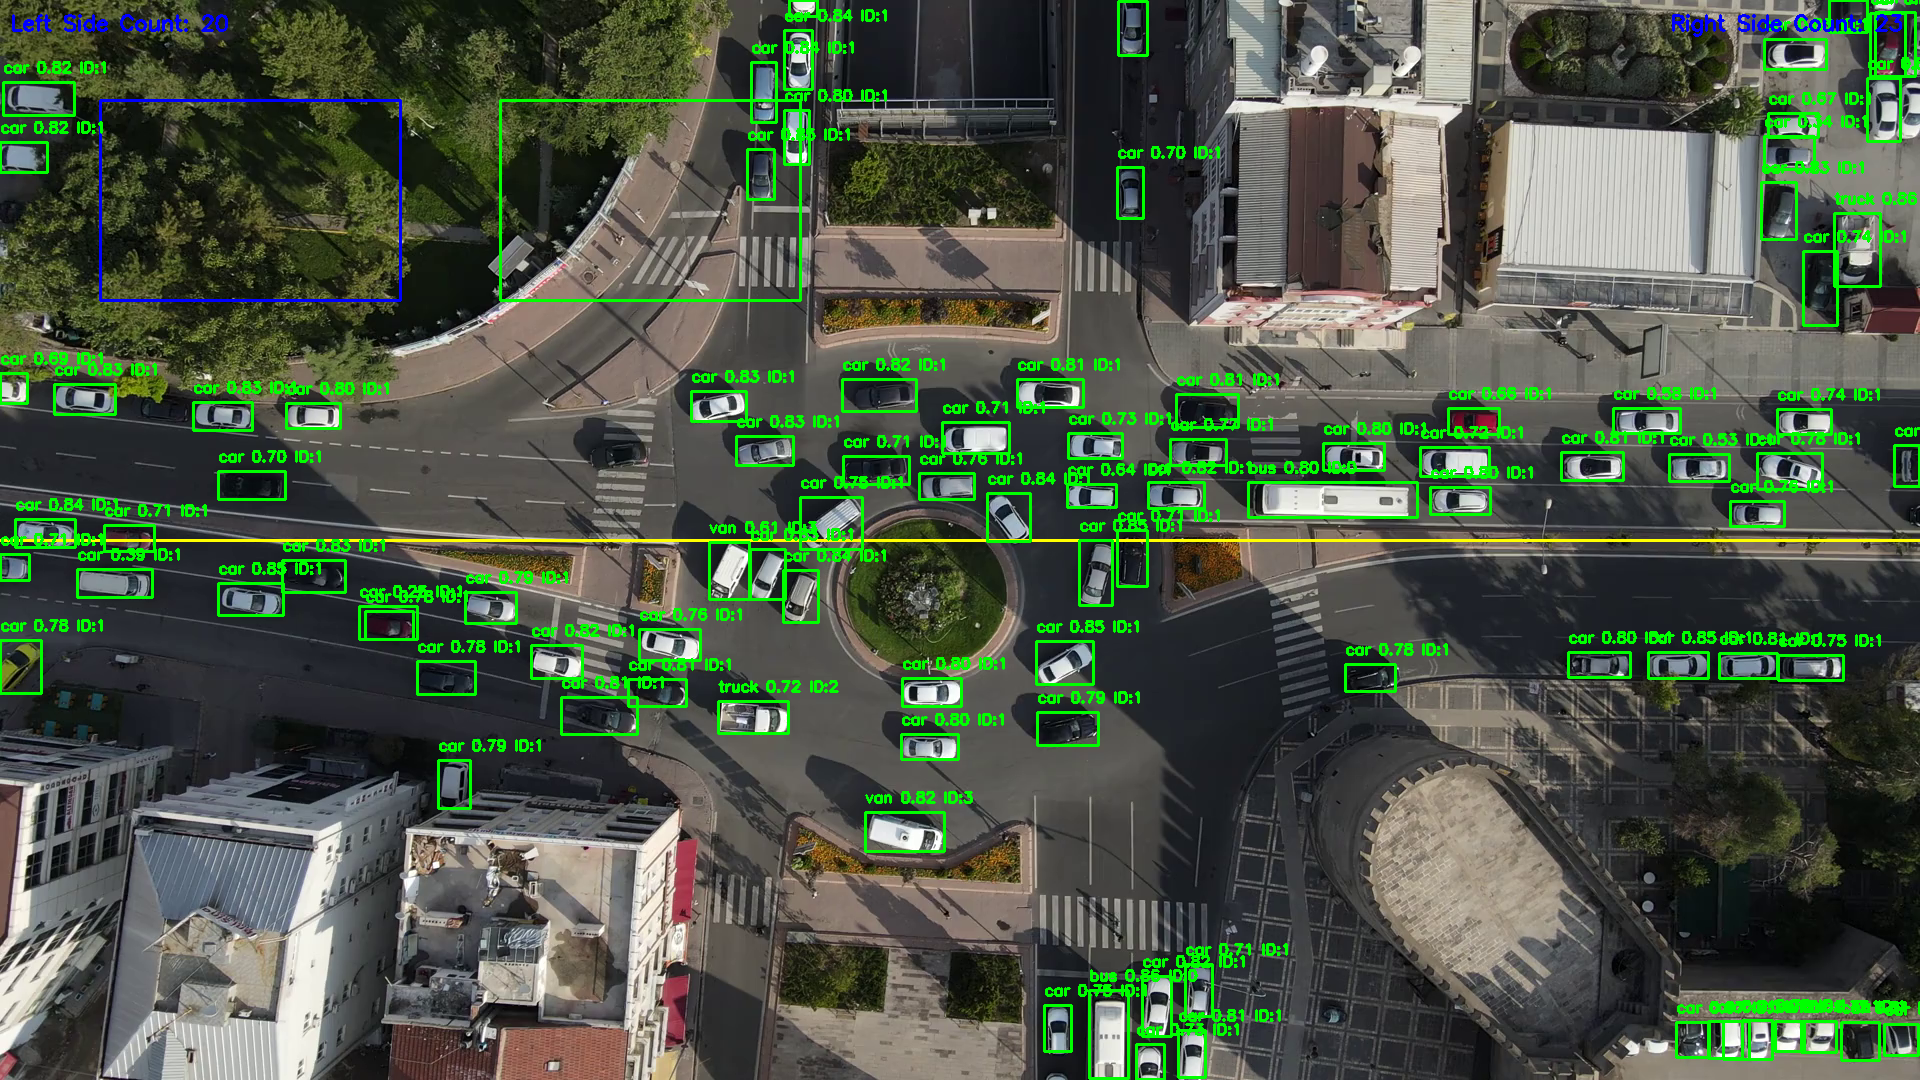

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load YOLO model
model = YOLO('/content/drive/MyDrive/YOLO_Model.pt')

# Video setup
video_path = '/content/drive/MyDrive/YOLO_Video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()


frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)


output_path = '/content/exam_output1.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))


right_count = 0
left_count = 0

line_y_position = frame_height // 2

# Define ROIs (Example Coordinates)
roi1 = (100, 100, 400, 300)  # Example ROI 1
roi2 = (500, 100, 800, 300)  # Example ROI 2

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model detection
    results = model(frame)


    cv2.line(frame, (0, line_y_position), (frame_width, line_y_position), (0, 255, 255), 2)


    cv2.rectangle(frame, (roi1[0], roi1[1]), (roi1[2], roi1[3]), (255, 0, 0), 2)  # ROI 1
    cv2.rectangle(frame, (roi2[0], roi2[1]), (roi2[2], roi2[3]), (0, 255, 0), 2)  # ROI 2

    for result in results:
        for obj in result.boxes:
            x1, y1, x2, y2 = map(int, obj.xyxy[0])
            confidence = obj.conf[0]
            class_id = int(obj.cls[0])
            label = model.names[class_id]


            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {confidence:.2f} ID:{class_id}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2


            if center_y > line_y_position:
                if center_x > frame_width // 2:
                    right_count += 1
            else:
                if center_x < frame_width // 2:
                    left_count += 1


    cv2.putText(frame, f"Left Side Count: {left_count}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    cv2.putText(frame, f"Right Side Count: {right_count}", (frame_width - 250, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    out.write(frame)


    cv2_imshow(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Total vehicles on the left side: {left_count}")
print(f"Total vehicles on the right side: {right_count}")
